In [ ]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
dataset_url = '/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/train_set'

In [ ]:
os.listdir(dataset_url)

['BA- cellulitis',
 'BA-impetigo',
 'FU-nail-fungus',
 'FU-ringworm',
 'VI-chickenpox',
 'PA-cutaneous-larva-migrans',
 'VI-shingles',
 'FU-athlete-foot']

In [ ]:
dataset_url

'/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/train_set'

In [ ]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/train_set')

In [ ]:
cellulitis=list(data_dir.glob('BA- cellulitis/*'))
len(cellulitis)

146

In [ ]:
FU_athlete_foot=list(data_dir.glob('FU-athlete-foot/*'))
len(FU_athlete_foot)

124

In [ ]:
VI_chickenpoxt=list(data_dir.glob('VI-chickenpox/*'))
len(VI_chickenpoxt)

136

In [ ]:
VI_shingles=list(data_dir.glob('VI-shingles/*'))
len(VI_shingles)

130

In [ ]:
FU_nail_fungus=list(data_dir.glob('FU-nail-fungus/*'))
len(FU_nail_fungus)

139

In [ ]:
BA_impetigo=list(data_dir.glob('BA-impetigo/*'))
len(BA_impetigo)

80

In [ ]:
FU_ringworm=list(data_dir.glob('FU-ringworm/*'))
len(FU_ringworm)

90

In [ ]:
PA_cutaneous_larva_migrans=list(data_dir.glob('PA-cutaneous-larva-migrans/*'))
len(PA_cutaneous_larva_migrans)

100

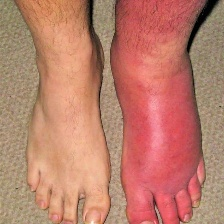

In [ ]:
PIL.Image.open(str(cellulitis[6]))

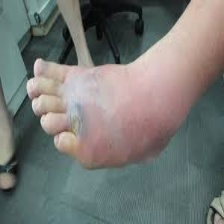

In [ ]:
PIL.Image.open(str(cellulitis[16]))

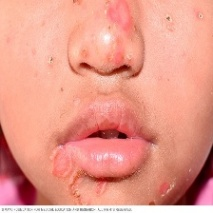

In [ ]:
PIL.Image.open(str(BA_impetigo[16]))

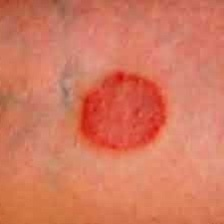

In [ ]:
PIL.Image.open(str(FU_ringworm[4]))

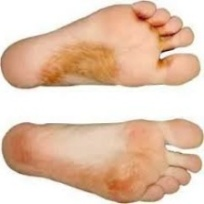

In [ ]:
PIL.Image.open(str(FU_athlete_foot[16]))

In [ ]:
cv2.imread(str( cellulitis[0])).shape[2]

3

In [ ]:
disease_images_train_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('normal/*')),
}

In [ ]:
disease_train_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [ ]:
x_train = []
y_train = []

for image_name, image_paths in disease_images_train_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_train.append(image_resize)
        y_train.append(disease_train_label_dic[image_name])

In [ ]:
x_train[0].shape

(224, 224, 3)

In [ ]:
len(disease_images_train_dic['ringworm']),len(disease_images_train_dic['shingles'])

(90, 130)

In [ ]:
len(x_train)

945

In [ ]:
len(y_train)

945

In [ ]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(945,)

In [ ]:
dataset_url='/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/test_set'

In [ ]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/test_set')

In [ ]:
disease_images_test_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('test_set/normal/*')),
}
disease_test_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [ ]:
x_test = []
y_test = []

for image_name, image_paths in disease_images_test_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_test.append(image_resize)
        y_test.append(disease_test_label_dic[image_name])

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
x_test.shape

(235, 224, 224, 3)

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.51372549, 0.50980392, 0.19215686],
        [0.5372549 , 0.53333333, 0.21568627],
        [0.54117647, 0.5372549 , 0.22352941],
        ...,
        [0.58431373, 0.55686275, 0.33333333],
        [0.59215686, 0.54509804, 0.38039216],
        [0.75294118, 0.70588235, 0.57254902]],

       [[0.51372549, 0.50980392, 0.19215686],
        [0.5372549 , 0.53333333, 0.21568627],
        [0.54117647, 0.5372549 , 0.22352941],
        ...,
        [0.56862745, 0.54117647, 0.31764706],
        [0.55686275, 0.51764706, 0.36078431],
        [0.70588235, 0.66666667, 0.53333333]],

       [[0.51372549, 0.50980392, 0.19215686],
        [0.5372549 , 0.53333333, 0.21568627],
        [0.54117647, 0.5372549 , 0.22352941],
        ...,
        [0.57647059, 0.54509804, 0.3372549 ],
        [0.54901961, 0.51764706, 0.36078431],
        [0.65882353, 0.62352941, 0.49411765]],

       ...,

       [[0.48235294, 0.45882353, 0.19607843],
        [0.49019608, 0.46666667, 0.20392157],
        [0.51764706, 0

In [ ]:
import tensorflow_hub as hub

In [ ]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)

In [ ]:
x_train_scaled.shape

(945, 224, 224, 3)

In [ ]:
model=keras.Sequential(
    [
        feature_extractor_layer,
        keras.layers.Dense(9,activation='softmax')
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)
model.fit(x_train_scaled,y_train,epochs=15)

Epoch 1/15
30/30 [==============================] - 37s 1s/step - loss: 1.3699 - accuracy: 0.5439
Epoch 2/15
30/30 [==============================] - 33s 1s/step - loss: 0.4761 - accuracy: 0.8857
Epoch 3/15
30/30 [==============================] - 43s 1s/step - loss: 0.2820 - accuracy: 0.9429
Epoch 4/15
30/30 [==============================] - 34s 1s/step - loss: 0.2030 - accuracy: 0.9683
Epoch 5/15
30/30 [==============================] - 36s 1s/step - loss: 0.1501 - accuracy: 0.9841
Epoch 6/15
30/30 [==============================] - 37s 1s/step - loss: 0.1187 - accuracy: 0.9852
Epoch 7/15
30/30 [==============================] - 34s 1s/step - loss: 0.0956 - accuracy: 0.9894
Epoch 8/15
30/30 [==============================] - 36s 1s/step - loss: 0.0784 - accuracy: 0.9958
Epoch 9/15
30/30 [==============================] - 33s 1s/step - loss: 0.0644 - accuracy: 0.9979
Epoch 10/15
30/30 [==============================] - 35s 1s/step - loss: 0.0543 - accuracy: 0.9989
Epoch 11/15
30/30 [

In [ ]:
x_test_scaled.shape

(235, 224, 224, 3)

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=15, validation_data=(x_test_scaled, y_test))

Epoch 1/15
30/30 [==============================] - 43s 1s/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 0.1142 - val_accuracy: 0.9702
Epoch 2/15
30/30 [==============================] - 45s 2s/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9660
Epoch 3/15
30/30 [==============================] - 38s 1s/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.1071 - val_accuracy: 0.9702
Epoch 4/15
30/30 [==============================] - 42s 1s/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.1056 - val_accuracy: 0.9702
Epoch 5/15
30/30 [==============================] - 41s 1s/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.9702
Epoch 6/15
30/30 [==============================] - 44s 1s/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.1012 - val_accuracy: 0.9702
Epoch 7/15
30/30 [==============================] - 42s 1s/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9702
Epoch 8/15
30/30 [==

In [ ]:
model.evaluate(x_test_scaled,y_test)

8/8 [==============================] - 10s 1s/step - loss: 0.0989 - accuracy: 0.9745


[0.09886208921670914, 0.9744681119918823]

In [ ]:
y_predict=model.predict(x_test_scaled)
# y_predict[0]
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))

y_predicted_labels=np.array(y_predicted_labels)

8/8 [==============================] - 10s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       1.00      1.00      1.00        20
           2       0.97      0.94      0.95        32
           3       0.97      1.00      0.99        33
           4       1.00      1.00      1.00        23
           5       0.96      0.92      0.94        25
           6       1.00      0.97      0.99        34
           7       0.94      1.00      0.97        34

    accuracy                           0.97       235
   macro avg       0.98      0.97      0.98       235
weighted avg       0.97      0.97      0.97       235



In [ ]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[33,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  1,  0,  1,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0],
       [ 1,  0,  1,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 34]], dtype=int32)>

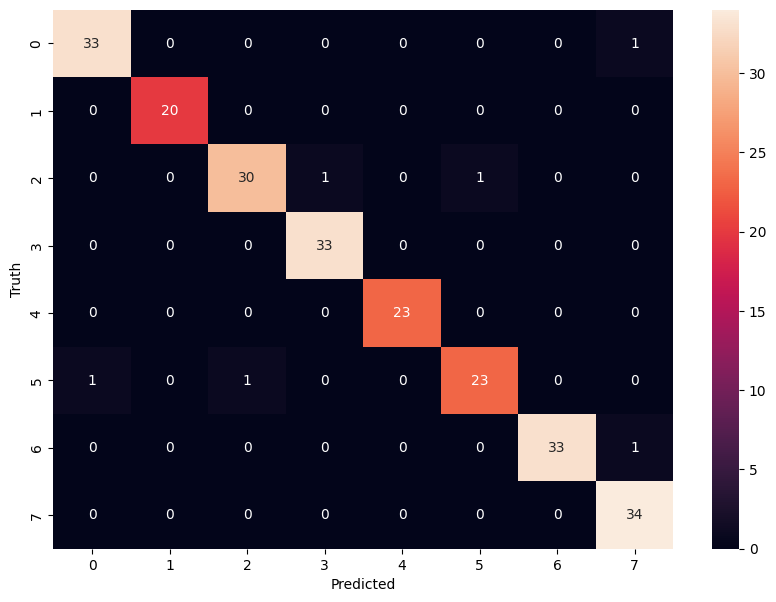

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Save model in SavedModel format
model.save('/content/drive/MyDrive/Machine Learning/saved_models/skin_disease_model_saved', save_format='tf')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics import classification_report

# Menyimpan model
model.save('/content/drive/MyDrive/Machine Learning/saved_models/skin_disease_modell.h5')

# Memuat model dari file HDF5 dengan custom_objects
loaded_model = keras.models.load_model(
    '/content/drive/MyDrive/Machine Learning/saved_models/skin_disease_model.h5',
    custom_objects={'KerasLayer': hub.KerasLayer}
)

# Evaluasi model yang dimuat
loaded_model.evaluate(x_test_scaled, y_test)

# Melakukan prediksi dengan model yang dimuat
y_predict_loaded = loaded_model.predict(x_test_scaled)
y_predicted_labels_loaded = [np.argmax(i) for i in y_predict_loaded]

# Menampilkan laporan klasifikasi untuk model yang dimuat
print("Classification Report: \n", classification_report(y_test, y_predicted_labels_loaded))


8/8 [==============================] - 8s 880ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.95      1.00      0.98        20
           2       0.94      0.91      0.92        32
           3       0.97      1.00      0.99        33
           4       0.92      1.00      0.96        23
           5       0.96      0.92      0.94        25
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.99        34

    accuracy                           0.97       235
   macro avg       0.97      0.97      0.97       235
weighted avg       0.97      0.97      0.97       235



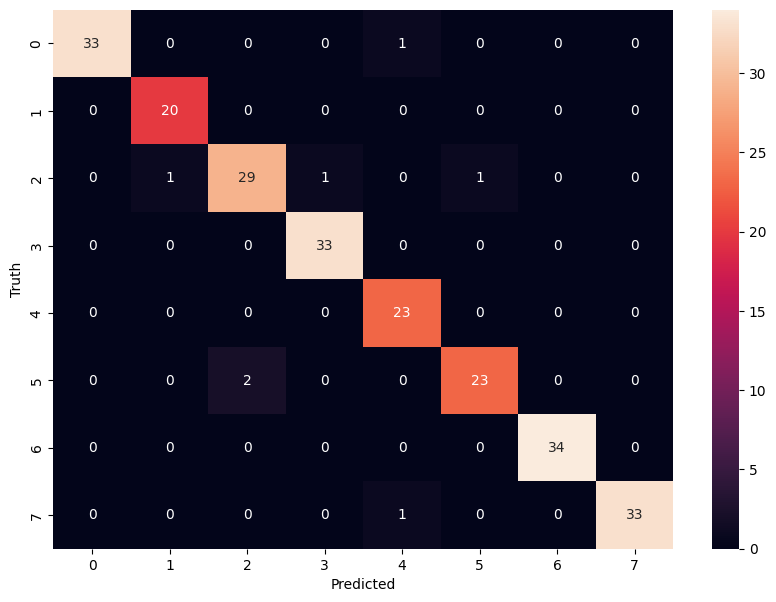

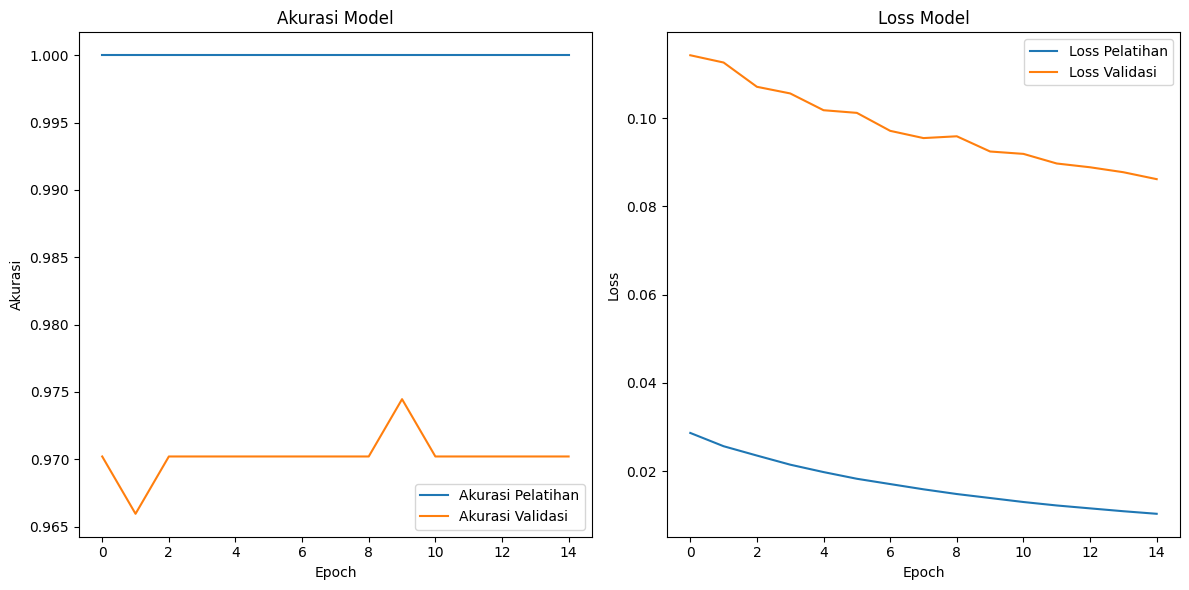

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Plot Akurasi dan Loss
# Plot Akurasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.title('Akurasi Model')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Model')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Define a function to handle custom objects when loading the model
def load_model_with_custom_objects(model_path):
    return tf.keras.models.load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})

# Load the model using the function
model_path = '/content/drive/MyDrive/Machine Learning/saved_models/skin_disease_model.h5'
loaded_model = load_model_with_custom_objects(model_path)

# Prepare test data (adjust according to your data structure)
test_loss, test_accuracy = loaded_model.evaluate(x_test_scaled, y_test)

print(f'Test Accuracy: {test_accuracy*100:.2f}%')


8/8 [==============================] - 7s 811ms/step - loss: 0.1183 - accuracy: 0.9702
Test Accuracy: 97.02%


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Function to load model with custom objects
def load_model_with_custom_objects(model_path):
    return tf.keras.models.load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})

# Path to the saved Keras model
model_path = '/content/drive/MyDrive/Machine Learning/saved_models/skin_disease_model.h5'

# Load the model
loaded_model = load_model_with_custom_objects(model_path)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TFLite model to file
tflite_model_file = '/content/drive/MyDrive/Machine Learning/saved_models/ModelDeploy1.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

print(f'TFLite model saved successfully to: {tflite_model_file}')


TFLite model saved successfully to: /content/drive/MyDrive/Machine Learning/saved_models/ModelDeploy1.tflite


In [ ]:
# Membuat Fungsi Predict untuk download tflite gambar

from google.colab import files
files.download('/content/drive/MyDrive/Machine Learning/saved_models/ModelDeploy1.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image
from skimage.io import imread
import cv2



model = loaded_model
category={0: 'Cellulitis', 1: 'Impetigo', 2: 'Athlete Foot', 3: 'Nail Fungus', 4: 'Ringworm', 5: 'Cutaneous Larva Migrans', 6: 'Chickenpox', 7: 'Shingles'}

# Fungsi untuk memprediksi gambar ( hanya 1 file )
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(244, 244))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 1.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediksi Gambar ini adalah - {}  ".format(category[index][1]))
    plt.imshow((img_array*1).astype(np.uint8))


# Fungsi untuk memprediksi gambar ( untuk 1 folder/direktori )
def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    fig=plt.figure(1, figsize=(25, 25))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(150, 150))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 1.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)[0]
        if pred==true:
            pos+=1

        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow((img_array*1).astype(np.uint8))

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

In [ ]:
!ls '/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/test_set/VI-shingles/'

'100_VI-shingles (27).jpg'  '148_VI-shingles (9).jpg'	'51_VI-shingles (21).jpg'
'106_VI-shingles (23).jpg'  '149_VI-shingles (26).jpg'	'57_VI-shingles (27).jpg'
'124_VI-shingles (3).jpg'   '158_VI-shingles (9).jpg'	'66_VI-shingles (11).jpg'
'127_VI-shingles (32).jpg'  '160_VI-shingles (30).jpg'	'70_VI-shingles (29).jpg'
'132_VI-shingles (6).jpg'   '161_VI-shingles (4).jpg'	'78_VI-shingles (13).jpg'
'136_VI-shingles (10).jpg'  '16_VI-shingles (12).jpg'	'89_VI-shingles (17).jpg'
'137_VI-shingles (4).jpg'   '18_VI-shingles (18).jpg'	'8_VI-shingles (15).jpg'
'138_VI-shingles (3).jpg'   '25_VI-shingles (12).jpg'	'93_VI-shingles (3) (1).jpg'
'139_VI-shingles (10).jpg'  '27_VI-shingles (1).jpg'	'93_VI-shingles (3).jpg'
'13_VI-shingles (3).jpeg'   '31_VI-shingles (30).jpg'	'99_VI-shingles (26).jpg'
'142_VI-shingles (34).jpg'  '42_VI-shingles (1).jpeg'
'143_VI-shingles (14).jpg'  '47_VI-shingles (9).jpg'


In [ ]:
# Directory containing images for prediction
test_directory = '/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/test_set/VI-shingles'

# Perform predictions
predictions = predict_dir(test_directory, loaded_model)

# Display predictions
for filename, predicted_label in predictions:
    print(f'File: {filename}, Predicted Label: {predicted_label}')

1/1 [==============================] - 0s 49ms/step
File: 132_VI-shingles (6).jpg, Predicted Label: 7
File: 127_VI-shingles (32).jpg, Predicted Label: 7
File: 100_VI-shingles (27).jpg, Predicted Label: 7
File: 106_VI-shingles (23).jpg, Predicted Label: 7
File: 124_VI-shingles (3).jpg, Predicted Label: 7
File: 137_VI-shingles (4).jpg, Predicted Label: 7
File: 136_VI-shingles (10).jpg, Predicted Label: 7
File: 66_VI-shingles (11).jpg, Predicted Label: 7
File: 31_VI-shingles (30).jpg, Predicted Label: 7
File: 148_VI-shingles (9).jpg, Predicted Label: 7
File: 16_VI-shingles (12).jpg, Predicted Label: 7
File: 78_VI-shingles (13).jpg, Predicted Label: 7
File: 70_VI-shingles (29).jpg, Predicted Label: 7
File: 139_VI-shingles (10).jpg, Predicted Label: 4
File: 158_VI-shingles (9).jpg, Predicted Label: 7
File: 47_VI-shingles (9).jpg, Predicted Label: 7
File: 143_VI-shingles (14).jpg, Predicted Label: 7
File: 161_VI-shingles (4).jpg, Predicted Label: 7
File: 57_VI-shingles (27).jpg, Predicted La

1/1 [==============================] - 1s 1s/step


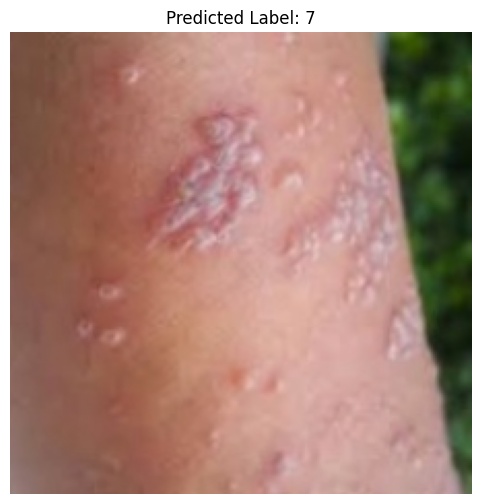

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Function to load model with custom objects
def load_model_with_custom_objects(model_path):
    return tf.keras.models.load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})

# Function to preprocess image for prediction
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (if needed)
    img = cv2.resize(img, (224, 224))  # Resize to match model's expected sizing
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Function to predict from a single image file
def predict_image(image_path, model):
    # Preprocess the image
    processed_img = preprocess_image(image_path)
    processed_img_input = np.expand_dims(processed_img, axis=0)  # Add batch dimension

    # Perform prediction
    prediction = model.predict(processed_img_input)
    predicted_label = np.argmax(prediction)

    return processed_img, predicted_label

# Path to the saved Keras model
model_path = '/content/drive/MyDrive/Machine Learning/saved_models/skin_disease_model.h5'

# Load the model using custom objects scope
loaded_model = load_model_with_custom_objects(model_path)

# Path to the image for prediction
image_path = '/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/test_set/VI-shingles/132_VI-shingles (6).jpg'

# Perform prediction on the image
processed_img, predicted_label = predict_image(image_path, loaded_model)

# Display the image and predicted label
plt.figure(figsize=(6, 6))
plt.imshow(processed_img)
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()


1/1 [==============================] - 1s 567ms/step


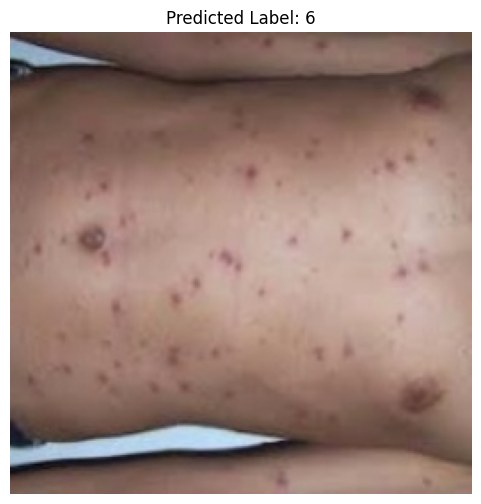

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Function to load model with custom objects
def load_model_with_custom_objects(model_path):
    return tf.keras.models.load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})

# Function to preprocess image for prediction
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Function to predict from a single image file
def predict_image(image_path, model):
    # Preprocess the image
    processed_img = preprocess_image(image_path)

    # Perform prediction
    prediction = model.predict(processed_img)
    predicted_label = np.argmax(prediction)

    return predicted_label

# Path to the saved Keras model
model_path = '/content/drive/MyDrive/Machine Learning/saved_models/skin_disease_model.h5'

# Load the model using custom objects scope
loaded_model = load_model_with_custom_objects(model_path)

# Path to the image for prediction
image_path = '/content/drive/MyDrive/Machine Learning/skin-disease-datasaet/test_set/VI-chickenpox/158_VI-chickenpox (17).jpg'

# Perform prediction on the image
predicted_label = predict_image(image_path, loaded_model)

# Display the image and predicted label
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()
